In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM 
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv(r'C:\Users\HP\Documents\TVSMOTOR.csv')

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-02,12.497500,12.497500,12.497500,12.497500,9.401971,100.0
1,2000-08-03,11.850000,12.000000,10.800000,11.547500,8.687276,33020.0
2,2000-08-04,11.650000,11.650000,10.900000,11.200000,8.425850,25500.0
3,2000-08-07,11.050000,11.050000,10.800000,10.807500,8.130568,13320.0
4,2000-08-08,10.350000,11.000000,10.350000,10.742500,8.081672,47520.0
...,...,...,...,...,...,...,...
5177,2021-04-16,540.000000,559.400024,537.000000,551.049988,551.049988,1867109.0
5178,2021-04-19,542.200012,542.200012,527.799988,539.200012,539.200012,1029456.0
5179,2021-04-20,544.000000,547.549988,532.799988,536.950012,536.950012,1292480.0
5180,2021-04-22,528.150024,536.349976,523.650024,533.849976,533.849976,1465204.0


In [6]:
df1=df.dropna()
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-02,12.497500,12.497500,12.497500,12.497500,9.401971,100.0
1,2000-08-03,11.850000,12.000000,10.800000,11.547500,8.687276,33020.0
2,2000-08-04,11.650000,11.650000,10.900000,11.200000,8.425850,25500.0
3,2000-08-07,11.050000,11.050000,10.800000,10.807500,8.130568,13320.0
4,2000-08-08,10.350000,11.000000,10.350000,10.742500,8.081672,47520.0
...,...,...,...,...,...,...,...
5177,2021-04-16,540.000000,559.400024,537.000000,551.049988,551.049988,1867109.0
5178,2021-04-19,542.200012,542.200012,527.799988,539.200012,539.200012,1029456.0
5179,2021-04-20,544.000000,547.549988,532.799988,536.950012,536.950012,1292480.0
5180,2021-04-22,528.150024,536.349976,523.650024,533.849976,533.849976,1465204.0


In [7]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-02,12.4975,12.4975,12.4975,12.4975,9.401971,100.0
1,2000-08-03,11.8500,12.0000,10.8000,11.5475,8.687276,33020.0
2,2000-08-04,11.6500,11.6500,10.9000,11.2000,8.425850,25500.0
3,2000-08-07,11.0500,11.0500,10.8000,10.8075,8.130568,13320.0
4,2000-08-08,10.3500,11.0000,10.3500,10.7425,8.081672,47520.0


In [8]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5.168000e+03
mean,162.818279,165.537619,159.829969,162.638104,155.747337,1.613798e+06
std,200.455312,203.212998,197.374725,200.323438,198.591522,2.112182e+06
min,3.260000,4.000000,3.055000,3.762500,2.830559,0.000000e+00
25%,29.639375,30.437501,29.000000,29.600000,24.588076,5.043112e+05
50%,48.274999,49.362499,47.150002,48.163750,39.799932,1.078958e+06
75%,290.000000,295.112503,285.662498,289.762497,278.901223,2.014426e+06
max,786.000000,794.450012,777.000000,785.049988,767.498230,5.041145e+07


In [9]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

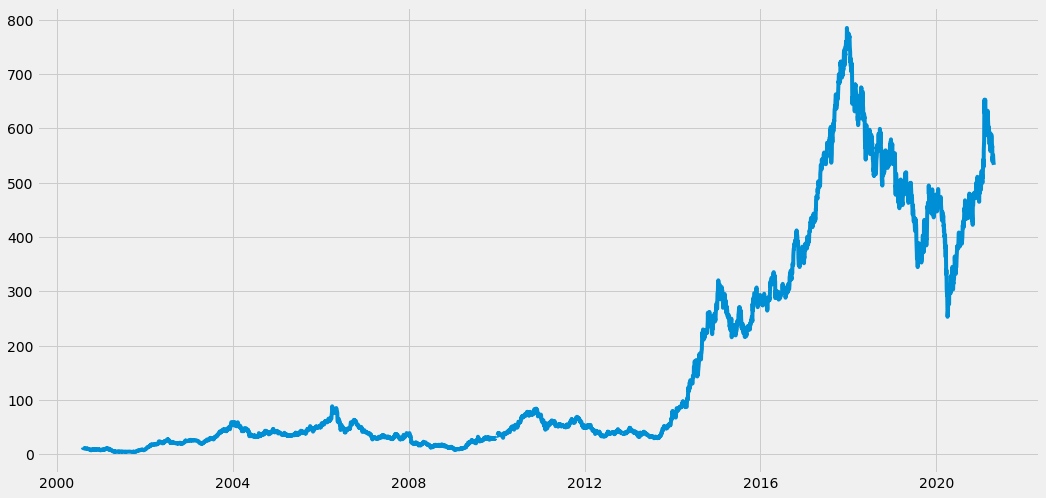

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [11]:
df1.shape

(5168, 7)

In [12]:
import datetime as dt

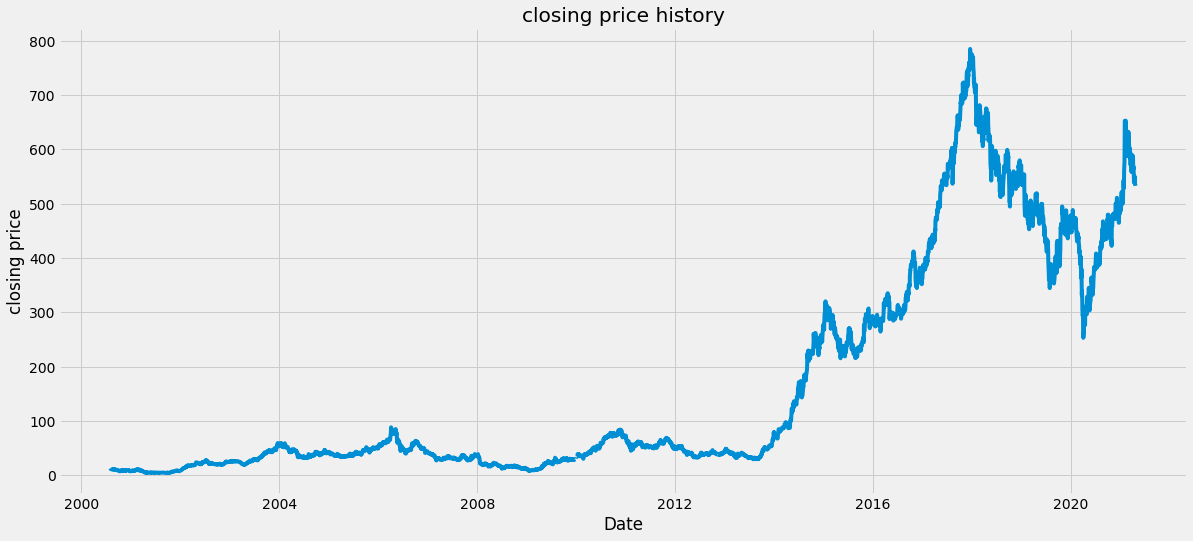

In [13]:
#visualize te closing price
plt.figure(figsize=(18,8))
plt.title('closing price history')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('closing price')
plt.show()

In [16]:
#create ne dataframe with only close column
data=df1.filter(['Close'])
data

,Close
0,12.497500
1,11.547500
2,11.200000
3,10.807500
4,10.742500
...,...
5177,551.049988
5178,539.200012
5179,536.950012
5180,533.849976


,Close
0,12.497500
1,11.547500
2,11.200000
3,10.807500
4,10.742500
...,...
5177,551.049988
5178,539.200012
5179,536.950012
5180,533.849976


In [17]:
#convert dataframe into numpy array
dataset=data.values
dataset

array([[ 12.4975  ],
       [ 11.5475  ],
       [ 11.2     ],
       ...,
       [536.950012],
       [533.849976],
       [532.799988]])

In [18]:
#get the number of rows to train te model
training_data_len=math.ceil(len(dataset)*.8)
training_data_len
#to train e take 80 prcent 


4135

In [19]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data


array([[0.01118026],
       [0.00996432],
       [0.00951954],
       ...,
       [0.68244727],
       [0.67847941],
       [0.67713549]])

In [20]:
#create te training dataset
#create the scaled traing dataset
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
x_train=[]     #independant training variables or training features
y_train=[]     #depndant variabls or target variables

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])     #pass 60 valus    position 0->59
    y_train.append(train_data[i,0])      #contain 61 value in position 60th
    if i<=60:
        print(x_train)
        print(y_train)
        print()
    


[array([0.01118026, 0.00996432, 0.00951954, 0.00901717, 0.00893397,
       0.00901397, 0.00919956, 0.00908756, 0.00882518, 0.00882518,
       0.00926356, 0.00890837, 0.00895317, 0.00887957, 0.00862359,
       0.00916756, 0.00889877, 0.00898197, 0.00901717, 0.00883798,
       0.00897557, 0.00862679, 0.00862679, 0.00881558, 0.0082556 ,
       0.0083132 , 0.00823001, 0.0082972 , 0.00815001, 0.00804441,
       0.00816921, 0.00738845, 0.00746844, 0.00731485, 0.00669408,
       0.00718366, 0.00721565, 0.00706526, 0.00702046, 0.00658848,
       0.00641249, 0.0061821 , 0.0061693 , 0.0061693 , 0.00583972,
       0.00568933, 0.00481897, 0.00482217, 0.00454698, 0.0041502 ,
       0.00503336, 0.00518375, 0.00468778, 0.00496296, 0.00482537,
       0.00490536, 0.00503976, 0.00655009, 0.00568613, 0.0063165 ])]
[0.006156504582343959]



In [21]:
#convrt x_train and y_train to numpy array so can use them to lstm model
x_train,y_train=np.array(x_train),np.array(y_train)
x_train,y_train


(array([[0.01118026, 0.00996432, 0.00951954, ..., 0.00655009, 0.00568613,
         0.0063165 ],
        [0.00996432, 0.00951954, 0.00901717, ..., 0.00568613, 0.0063165 ,
         0.0061565 ],
        [0.00951954, 0.00901717, 0.00893397, ..., 0.0063165 , 0.0061565 ,
         0.00614691],
        ...,
        [0.45826599, 0.43996289, 0.45429822, ..., 0.49365633, 0.4962162 ,
         0.50210389],
        [0.43996289, 0.45429822, 0.45967394, ..., 0.4962162 , 0.50210389,
         0.49756012],
        [0.45429822, 0.45967394, 0.45820201, ..., 0.50210389, 0.49756012,
         0.5041518 ]]),
 array([0.0061565 , 0.00614691, 0.00604451, ..., 0.49756012, 0.5041518 ,
        0.51739917]))

In [22]:
#reshape te data.... y?lstm model expct the input in 3d form of samples 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(4075, 60, 1)

In [23]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
#compile th model
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
#train te model
model.fit(x_train,y_train,batch_size=1,epochs=1)

4075/4075 [==============================] - 203s 39ms/step - loss: 5.2108e-04


In [26]:
#create testing dataset
#create a new array containing scaled values from indx 3568 to 5182
test_data=scaled_data[training_data_len - 60:,:]
#create dataset x_test and y_tst
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [27]:
#convert data into numpy array
x_test=np.array(x_test)

In [28]:
#reshap the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [29]:
#get te model prdictd price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [30]:
#get te root mean squared error(RMSE).....   how accurate te model prdicts te response and sd of 
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

60.92674214329046

<ipython-input-31-d707939af344>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


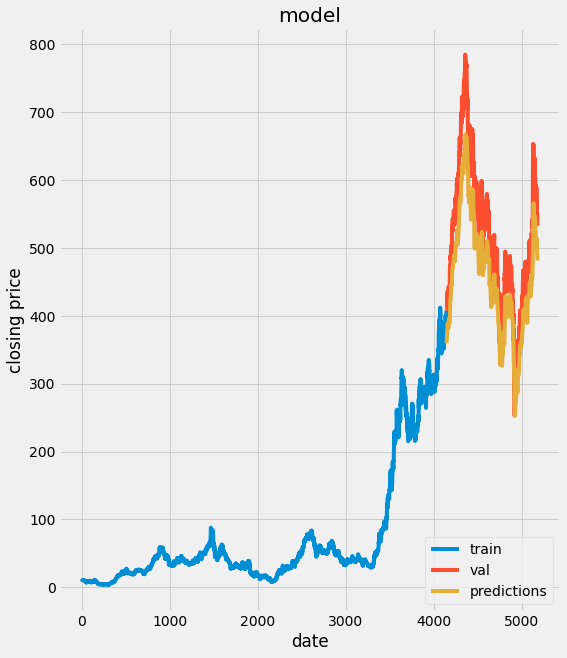

In [31]:
#plot te data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualiz te data
plt.figure(figsize=(8,10))
plt.title('model')
plt.xlabel('date')
plt.ylabel('closing price')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='lower right')
plt.show()